In this notes I try to implement nn architectures using Keras modular way and PyTorch ,Keras is literally a Tensorflow for everyone I abondonned Tensorflow because of it's complex API and inner workings,keras on the other hand permits to build neural networks easier and faster let's build a simple MLP using Keras 

In [1]:
from __future__ import print_function
import keras


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adadelta,RMSprop



In [3]:
batch_size = 64 #smaller batch size is to ease the load on the memory
num_classes = 10 #classification problems have n_classes they tend to be equal to the number of neurons on the output layer
epochs = 10 #number of epochs

#load shuffle split the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# preprocess the data
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

print(x_train[0],'train samples')
print(x_test[0],'test samples')


[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [4]:
#convert class vector to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

## Building The Model

Keras modularity is perfect,building the models become a question of reproducing the designated neurons from for example a graph ,you define a model (sequential as in feed forward) and stack the layers one after one accordingly

In [5]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax')) #softmax turn the output to a probabilistic one

#show the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
#compiling the model by adding a loss function & an optimizer
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])



In [7]:
#training the model and saving the evolution history
history = model.fit(x_train,y_train
                   ,batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test,y_test))
#score the accuracy of our model
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss : ',score[0])
print('Test accuracy : ',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s - loss: 0.2217 - acc: 0.9331 - val_loss: 0.1017 - val_acc: 0.9688
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.1071 - acc: 0.9691 - val_loss: 0.0936 - val_acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 19s - loss: 0.0863 - acc: 0.9762 - val_loss: 0.0834 - val_acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 19s - loss: 0.0744 - acc: 0.9796 - val_loss: 0.0845 - val_acc: 0.9784
Epoch 5/10
60000/60000 [==============================] - 21s - loss: 0.0657 - acc: 0.9823 - val_loss: 0.0812 - val_acc: 0.9814
Epoch 6/10
60000/60000 [==============================] - 20s - loss: 0.0629 - acc: 0.9839 - val_loss: 0.0987 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 19s - loss: 0.0574 - acc: 0.9856 - val_loss: 0.1233 - val_acc: 0.9790
Epoch 8/10
60000/60000 [==============================

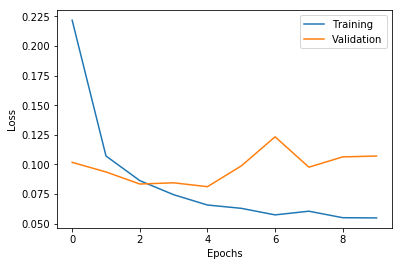

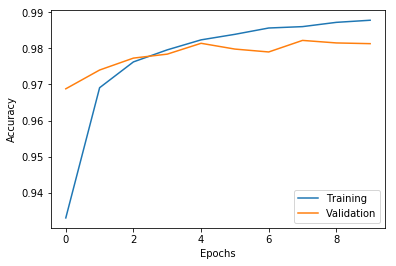

In [8]:
# plotting the network performance
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

From the early above results we can see that after 4 epochs our network loss began to converge faster towards 0,on the accuracy graph we can see how we performed on the validation set .

From this simple example we can see how keras helps us optimize time instead of spending more time on understanding tensorflow complex mechanics keras offers a faster way to do research and learn .

**Spend more time on research than on the framework,Keras + PyTorch will help you go productive !**